<a href="https://colab.research.google.com/github/Mubarak-ml/Data-Science-Projects/blob/main/Machine_Learning_Model_for_Ransomware_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve
from sklearn.metrics import f1_score

In [ ]:
Dataset = pd.read_csv('/content/drive/MyDrive/ML Dataset/data_file.csv')

In [ ]:
Dataset.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332.0,0.0,0.0,0.0,4.0,0.0,0.0,8192.0,8.0,0.0,3.0,1048576.0,34112.0,672.0,0.0,1.0
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404.0,84.0,121728.0,10.0,10.0,126576.0,4930.0,0.0,14.0,10.0,8.0,262144.0,16864.0,1024.0,0.0,1.0
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332.0,0.0,0.0,0.0,4.0,0.0,0.0,8192.0,8.0,0.0,3.0,1048576.0,34112.0,672.0,0.0,1.0
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404.0,84.0,19904.0,10.0,10.0,21312.0,252.0,18160.0,14.0,10.0,6.0,262144.0,16736.0,1040.0,0.0,1.0
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404.0,84.0,97728.0,10.0,10.0,105792.0,1852.0,70592.0,14.0,10.0,7.0,262144.0,16736.0,1096.0,0.0,1.0


In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34855 entries, 0 to 34854
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FileName            34855 non-null  object 
 1   md5Hash             34855 non-null  object 
 2   Machine             34854 non-null  float64
 3   DebugSize           34854 non-null  float64
 4   DebugRVA            34854 non-null  float64
 5   MajorImageVersion   34854 non-null  float64
 6   MajorOSVersion      34854 non-null  float64
 7   ExportRVA           34854 non-null  float64
 8   ExportSize          34854 non-null  float64
 9   IatVRA              34854 non-null  float64
 10  MajorLinkerVersion  34854 non-null  float64
 11  MinorLinkerVersion  34854 non-null  float64
 12  NumberOfSections    34854 non-null  float64
 13  SizeOfStackReserve  34854 non-null  float64
 14  DllCharacteristics  34854 non-null  float64
 15  ResourceSize        34854 non-null  float64
 16  Bitc

In [ ]:
Dataset.shape

(34855, 18)

In [ ]:
Dataset['Benign'].value_counts()

1.0    27118
0.0     7736
Name: Benign, dtype: int64

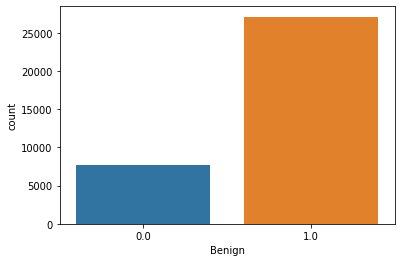

In [ ]:
sns.countplot(x='Benign', data=Dataset)

1.0 ------> Benign Data

0.0 ------> Ransomware Data

In [ ]:
Dataset.groupby('Benign').mean()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses
Benign,,,,,,,,,,,,,,,
0.0,336.404343,4.851861,41202.322647,10.014478,4.520295,1.380229e+06,1.016652e+06,63748.340745,7.408609,8.016675,4.794338,1.046824e+06,9267.597079,83624.193899,0.012410
1.0,15130.166531,43.906040,312342.296040,121.893834,6.573899,3.537788e+05,3.770666e+03,255314.197065,12.850395,4.455491,4.701269,6.733669e+05,17666.434398,141576.034036,0.026329


# Feature Selection
Model will be train with features that are Numerical Values

In [ ]:
NewDataset = Dataset.drop(columns = ['FileName','md5Hash'],axis=1)

In [ ]:
print (NewDataset)

       Machine  DebugSize  DebugRVA  MajorImageVersion  MajorOSVersion  \
0        332.0        0.0       0.0                0.0             4.0   
1      34404.0       84.0  121728.0               10.0            10.0   
2        332.0        0.0       0.0                0.0             4.0   
3      34404.0       84.0   19904.0               10.0            10.0   
4      34404.0       84.0   97728.0               10.0            10.0   
...        ...        ...       ...                ...             ...   
34850    332.0        0.0       0.0                0.0             4.0   
34851    332.0        0.0       0.0                1.0             4.0   
34852    332.0        0.0       0.0                1.0             4.0   
34853    332.0        0.0       0.0                0.0             4.0   
34854      NaN        NaN       NaN                NaN             NaN   

       ExportRVA  ExportSize    IatVRA  MajorLinkerVersion  \
0            0.0         0.0    8192.0           

In [ ]:
NewDataset = NewDataset.dropna(how='any')

**Data Visualization**

In [ ]:
# Seperating Data and Targets

X = NewDataset.drop(columns = 'Benign', axis=1)
Y = NewDataset['Benign']

In [ ]:
print (X)

       Machine  DebugSize  DebugRVA  MajorImageVersion  MajorOSVersion  \
0        332.0        0.0       0.0                0.0             4.0   
1      34404.0       84.0  121728.0               10.0            10.0   
2        332.0        0.0       0.0                0.0             4.0   
3      34404.0       84.0   19904.0               10.0            10.0   
4      34404.0       84.0   97728.0               10.0            10.0   
...        ...        ...       ...                ...             ...   
34849    332.0        0.0       0.0                0.0             4.0   
34850    332.0        0.0       0.0                0.0             4.0   
34851    332.0        0.0       0.0                1.0             4.0   
34852    332.0        0.0       0.0                1.0             4.0   
34853    332.0        0.0       0.0                0.0             4.0   

       ExportRVA  ExportSize    IatVRA  MajorLinkerVersion  \
0            0.0         0.0    8192.0           

In [ ]:
print (Y)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
34849    0.0
34850    0.0
34851    0.0
34852    0.0
34853    0.0
Name: Benign, Length: 34854, dtype: float64


In [ ]:
# Data Standardization and Transformation

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[-0.71328671 -1.02431866 -0.12564024 ...  1.15287147 -0.07624648
  -0.15424895]
 [ 1.39734252  1.41745657 -0.06498891 ...  0.06685148 -0.07603687
  -0.15424895]
 [-0.71328671 -1.02431866 -0.12564024 ...  1.15287147 -0.07624648
  -0.15424895]
 ...
 [-0.71328671 -1.02431866 -0.12564024 ... -0.99498995 -0.07574151
  -0.15424895]
 [-0.71328671 -1.02431866 -0.12564024 ... -0.99498995 -0.04601976
  -0.15424895]
 [-0.71328671 -1.02431866 -0.12564024 ... -0.99498995  0.05131078
  -0.15424895]]


In [ ]:
X = standardized_data
Y = NewDataset['Benign']

In [ ]:
print(X)
print(Y)

[[-0.71328671 -1.02431866 -0.12564024 ...  1.15287147 -0.07624648
  -0.15424895]
 [ 1.39734252  1.41745657 -0.06498891 ...  0.06685148 -0.07603687
  -0.15424895]
 [-0.71328671 -1.02431866 -0.12564024 ...  1.15287147 -0.07624648
  -0.15424895]
 ...
 [-0.71328671 -1.02431866 -0.12564024 ... -0.99498995 -0.07574151
  -0.15424895]
 [-0.71328671 -1.02431866 -0.12564024 ... -0.99498995 -0.04601976
  -0.15424895]
 [-0.71328671 -1.02431866 -0.12564024 ... -0.99498995  0.05131078
  -0.15424895]]
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
34849    0.0
34850    0.0
34851    0.0
34852    0.0
34853    0.0
Name: Benign, Length: 34854, dtype: float64


In [ ]:
# Splitting the dataset into Training and Testing set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(34854, 15) (24397, 15) (10457, 15)


In [ ]:
# Training the Model with Training dataset
classifier = svm.SVC(kernel='linear')

# **Training and Evaluating Logistic Regression Model**

In [ ]:
#Training the logistic regression model
model1 = LogisticRegression()

In [ ]:
model1.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#Accuracy Score on Training
X_train_prediction1 = model1.predict(X_train)
training_data_accuracy1 = accuracy_score(Y_train, X_train_prediction1)

print('Accuracy on training data = ',training_data_accuracy1)

Accuracy on training data =  0.9433946796737304


# **Training and Evaluating Random Forest Model**

In [ ]:
#Training the Random Forest
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#Accuracy Score on Training
X_train_prediction2 = model2.predict(X_train)
training_data_accuracy2 = accuracy_score(Y_train, X_train_prediction1)

print('Accuracy on training data = ',training_data_accuracy2)

Accuracy on training data =  0.9433946796737304


In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


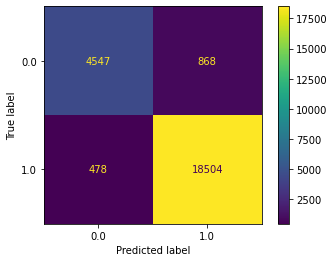

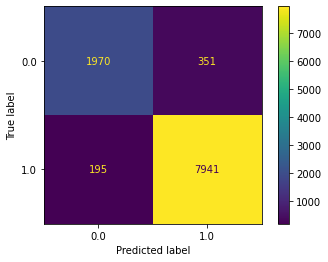

In [ ]:
plot_confusion_matrix (classifier,X_train,Y_train)
plot_confusion_matrix (classifier,X_test,Y_test)

Model Evaluation

In [ ]:
# Model Evaluation

# Accuracy Score

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.944829282288806


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9477861719422397


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


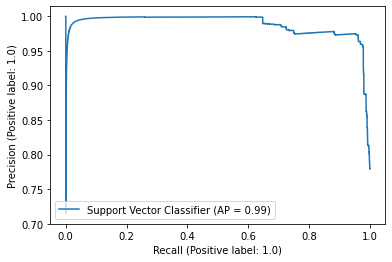

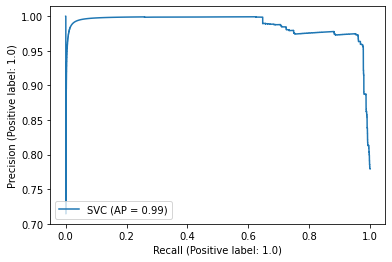

In [ ]:
# Plotting the other evaluation metrics
plot_precision_recall_curve( classifier, X_test, Y_test, name = 'Support Vector Classifier')
plot_precision_recall_curve( classifier,X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


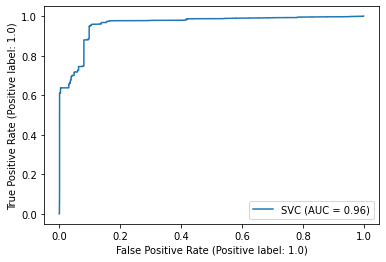

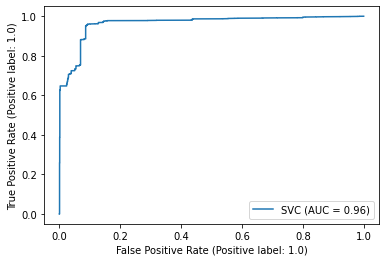

In [ ]:
plot_roc_curve (classifier,X_train,Y_train)
plot_roc_curve (classifier,X_test,Y_test)

In [ ]:
 f = f1_score(Y_train, X_train_prediction )
 print("\t[*] F1 Score: ", round(f*100, 2), '%')

	[*] F1 Score:  96.49 %


Making a Ransomware detection system

In [ ]:
input_data = (332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,1136,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The Sample is a Ransomware file')
else:
  print('The Sample is clean not Ransomware file')

[[-0.71328671 -1.02431866 -0.12564024 -0.07019168 -0.89502188 -0.02411551
  -0.01075138 -0.13728843 -0.41331305 -0.48546139 -0.83694378  0.41373468
   1.15287147 -0.07597018 -0.15424895]]
[1.]
The Sample is clean not Ransomware file


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
